# Exercise 7

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [122]:
def simulated_annealing(initial_state, energy, permute, t_func, N):
    state = initial_state
    energies = np.empty(N)
    accepted = np.zeros(N)

    for k in range(N):
        T = t_func(k)
        proposed_state = permute(state)

        e_state = energy(state)
        e_proposed = energy(proposed_state)

        energies[k] = e_state

        accept_prob = min(1, np.exp(-(e_proposed - e_state) / T))

        if uniform.rvs() < accept_prob:
            state = proposed_state
            accepted[k] = 1
    
    return state, energies, accepted

In [123]:
def plot_route(ax, x, y, indices, title):
    ax.set_title(title)
    ax.plot(x, y, 'o')  # draw points
    closed_indices = np.append(indices, indices[0])  # return to start
    ax.plot(x[closed_indices], y[closed_indices], '-')  # draw route

def plot_simulated_annealing(initial_state, energy, permute, t_func, N):
    solution, energies, accepted = simulated_annealing(initial_state, energy, permute, t_func, N)

    accept_iters = np.where(accepted == 1)[0]

    fig, axes = plt.subplots(2, 2, figsize=(20, 8))

    axes[0, 0].set_title("Temperature and acceptance")
    axes[0, 0].plot(np.arange(N), t_func(np.arange(N)), label="Temperature")
    axes[0, 0].hist(accept_iters, range=(0, N), label="Accepted (hist.)")
    axes[0, 0].set_xlabel("Iteration")
    axes[0, 0].legend()

    axes[0, 1].set_title("Energies")
    axes[0, 1].plot(energies)
    axes[0, 0].set_xlabel("Iteration")

    fig.suptitle("Simulated Annealing of Traveling Salesman Problem")

    plot_route(axes[1, 0], x, y, initial_state, f"Initial state, cost: {energy(initial_state):.2f}")
    plot_route(axes[1, 1], x, y, solution, f"Solution, cost: {energy(solution):.2f}")
    fig.tight_layout()

In [145]:
def permute(state):
    state = state.copy()
    indices = np.random.choice(n_stations, size=2, replace=False)
    state[indices] = state[indices[::-1]]
    return state

def get_t_func(t0, alpha):
    def t_func(k):
        return t0 * alpha ** k
    return t_func

def energy(state):
    cost = 0
    for i in range(n_stations):
        cost += cost_matrix[state[i], state[(i + 1) % n_stations]]
    return cost

/tmp/ipykernel_44360/1096169008.py:15: RuntimeWarning: overflow encountered in exp
  accept_prob = min(1, np.exp(-(e_proposed - e_state) / T))


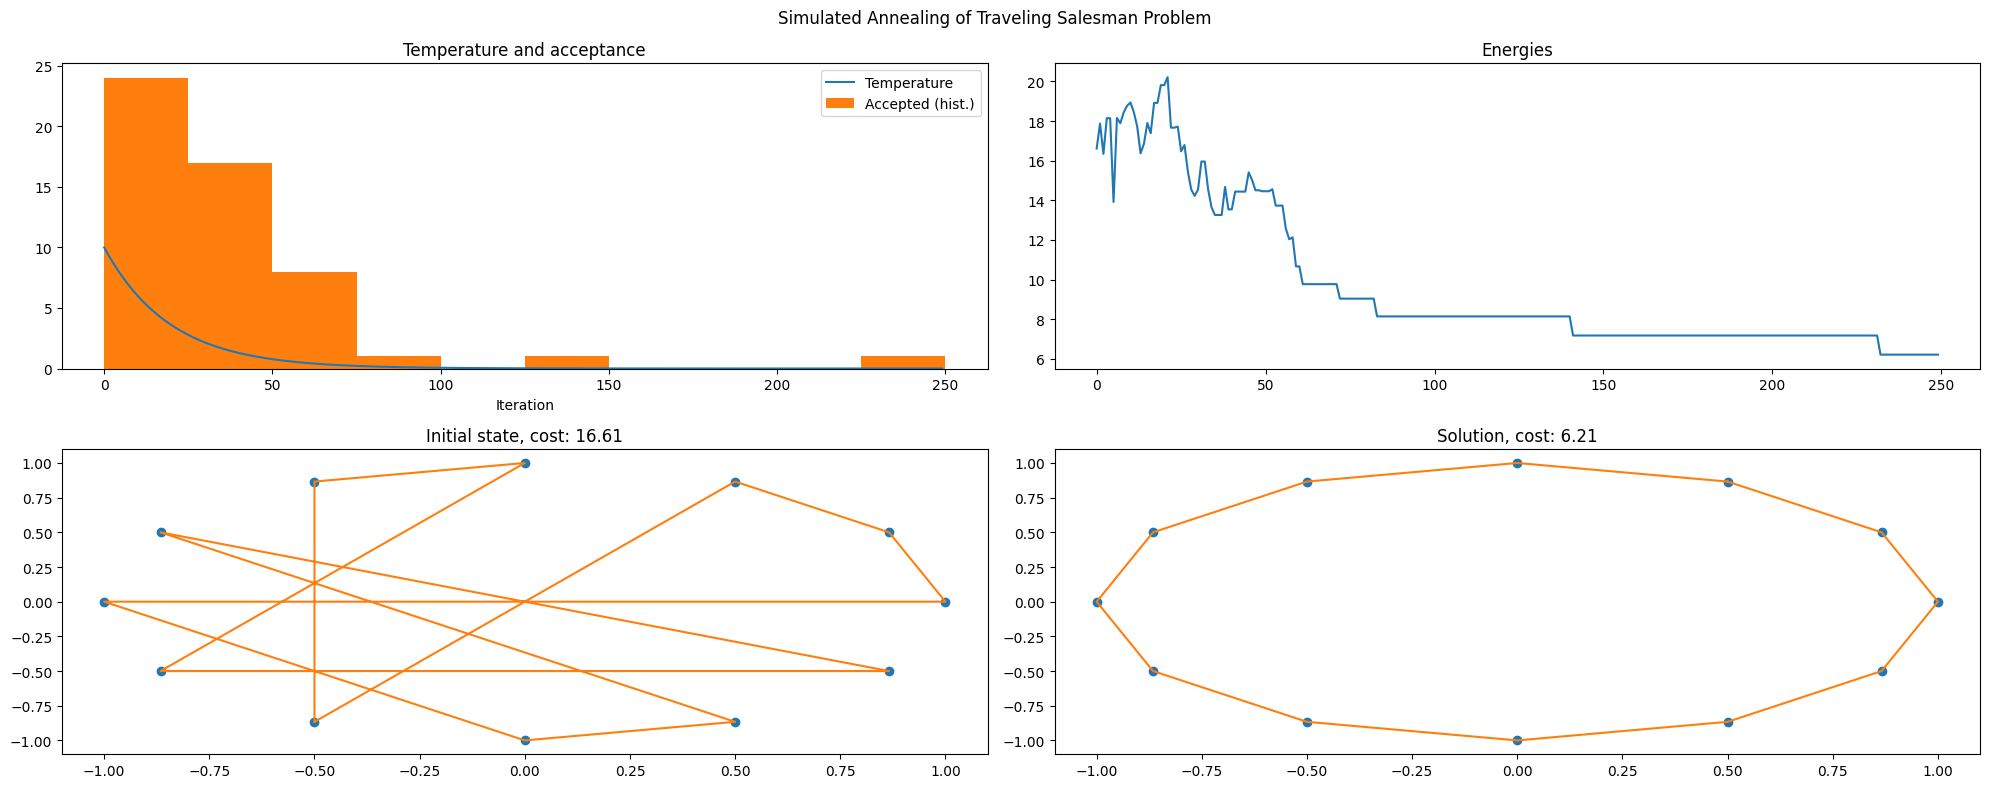

In [153]:
n_stations = 12
stations = np.arange(n_stations)

theta = 2 * np.pi * stations / n_stations
x = np.cos(theta)
y = np.sin(theta)

cost_matrix = np.empty((n_stations, n_stations))
for i in range(n_stations):
    for j in range(n_stations):
        cost_matrix[i, j] = np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)

N = 250
initial_state = np.random.permutation(np.arange(n_stations))

plot_simulated_annealing(initial_state, energy, permute, get_t_func(10, 0.95), N)

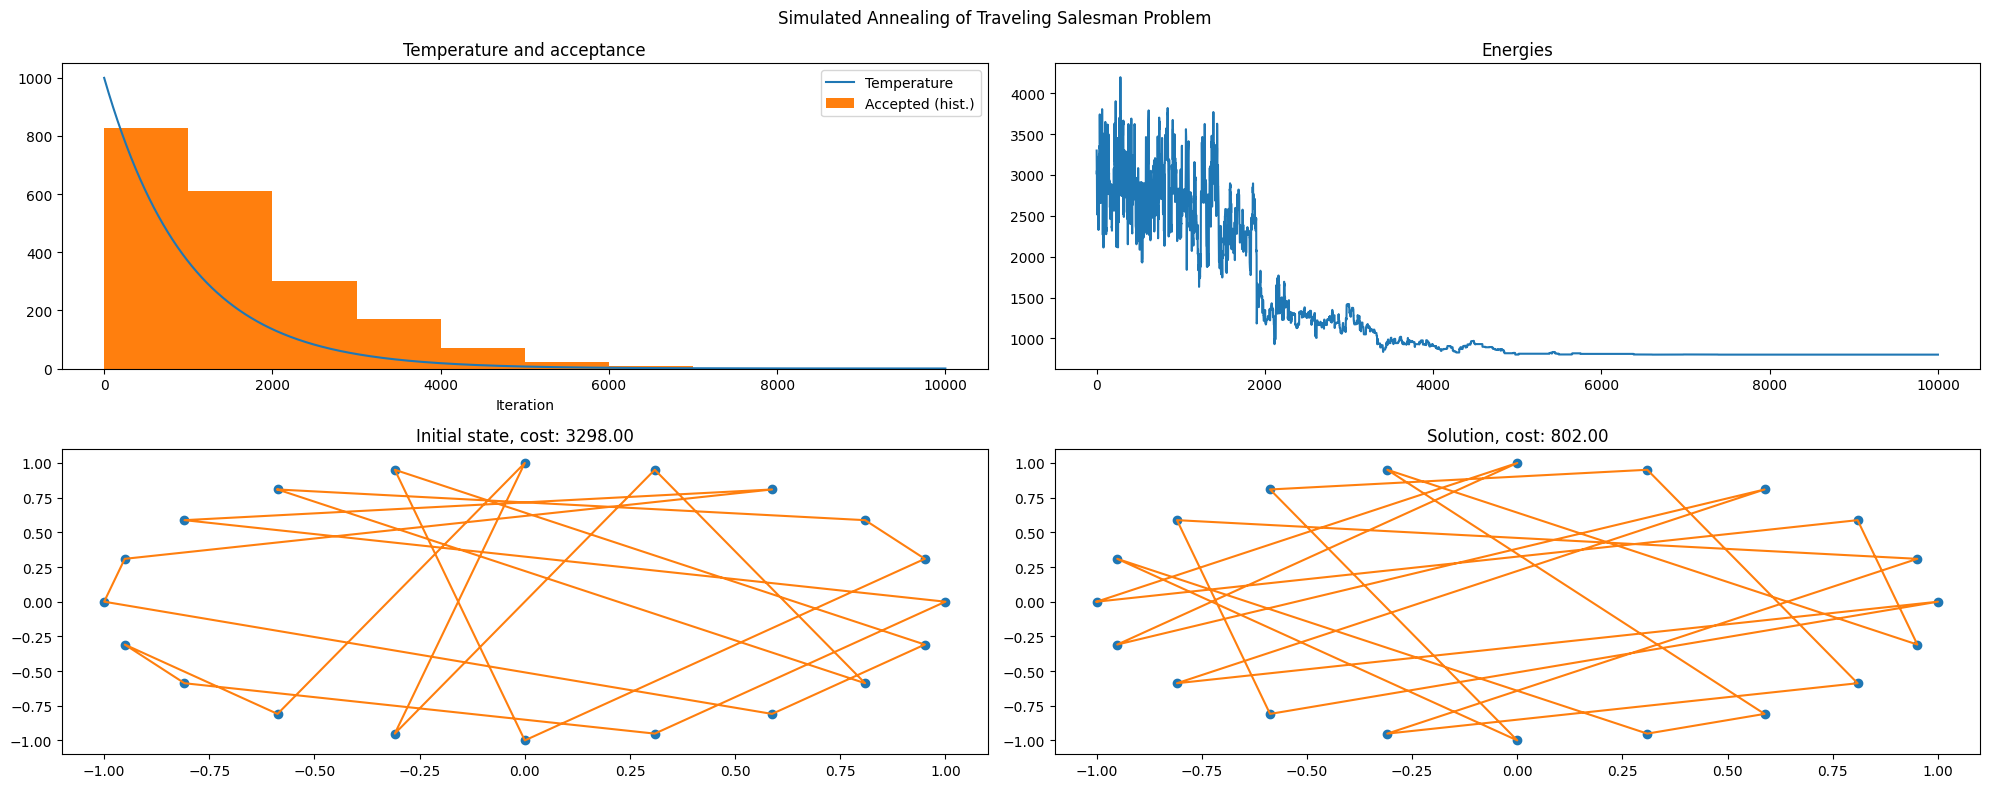

In [177]:
cost_matrix = np.array([
    [0, 225, 110, 8, 257, 22, 83, 231, 277, 243, 94, 30, 4, 265, 274, 250, 87, 83, 271, 86],
    [255, 0, 265, 248, 103, 280, 236, 91, 3, 87, 274, 265, 236, 8, 24, 95, 247, 259, 28, 259],
    [87, 236, 0, 95, 248, 110, 25, 274, 250, 271, 9, 244, 83, 250, 248, 280, 29, 26, 239, 7],
    [8, 280, 83, 0, 236, 28, 91, 239, 280, 259, 103, 23, 6, 280, 244, 259, 95, 87, 230, 84],
    [268, 87, 239, 271, 0, 244, 275, 9, 84, 25, 244, 239, 275, 83, 110, 24, 274, 280, 84, 274],
    [21, 265, 99, 29, 259, 0, 99, 230, 265, 271, 87, 5, 22, 239, 236, 250, 87, 95, 271, 91],
    [95, 236, 28, 91, 247, 93, 0, 247, 259, 244, 27, 91, 87, 268, 275, 280, 7, 8, 240, 27],
    [280, 83, 250, 261, 4, 239, 230, 0, 103, 24, 239, 261, 271, 95, 87, 21, 274, 255, 110, 280],
    [247, 9, 280, 274, 84, 255, 259, 99, 0, 87, 255, 274, 280, 3, 27, 83, 259, 244, 28, 274],
    [230, 103, 268, 275, 23, 244, 264, 28, 83, 0, 268, 275, 261, 91, 95, 8, 277, 261, 84, 247],
    [87, 239, 9, 103, 261, 110, 29, 255, 239, 261, 0, 259, 84, 239, 261, 242, 24, 25, 242, 5],
    [30, 255, 95, 30, 247, 4, 87, 274, 242, 255, 99, 0, 24, 280, 274, 259, 91, 83, 247, 91],
    [8, 261, 83, 6, 255, 29, 103, 261, 247, 242, 110, 29, 0, 261, 244, 230, 87, 84, 280, 100],
    [242, 8, 259, 280, 99, 242, 244, 99, 3, 84, 280, 236, 259, 0, 27, 95, 274, 261, 24, 268],
    [274, 22, 250, 236, 83, 261, 247, 103, 22, 91, 250, 236, 261, 25, 0, 103, 255, 261, 5, 247],
    [244, 91, 261, 255, 28, 236, 261, 29, 103, 9, 242, 261, 244, 87, 110, 0, 242, 236, 95, 259],
    [84, 236, 27, 99, 230, 83, 7, 259, 230, 230, 22, 87, 93, 250, 255, 247, 0, 9, 259, 24],
    [91, 242, 28, 87, 250, 110, 6, 271, 271, 255, 27, 103, 84, 250, 271, 244, 5, 0, 271, 29],
    [261, 24, 250, 271, 84, 255, 261, 87, 28, 110, 250, 248, 248, 22, 3, 103, 271, 248, 0, 236],
    [103, 271, 8, 91, 255, 91, 21, 271, 236, 271, 7, 250, 83, 247, 250, 271, 22, 27, 248, 0]
])

n_stations = cost_matrix.shape[0]
stations = np.arange(n_stations)

# draw in circle pattern even though we dont know positions
theta = 2 * np.pi * stations / n_stations
x = np.cos(theta)
y = np.sin(theta)

N = 10_000
initial_state = np.random.permutation(np.arange(n_stations))

plot_simulated_annealing(initial_state, energy, permute, get_t_func(1000, 0.999), N)